In [40]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import rectangle
from skimage.filters import sobel
from skimage.io import imread


plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (16, 12)

# figure out regex search
IMAGES_PATH = Path('./lazy_d_core_photos/')
search = "core_photo*box9.jpg"

def img_get(path=IMAGES_PATH, search=search):
    """return posix path for images"""
    return sorted(list(IMAGES_PATH.glob(search)))

def img_plot(image):
    """quick plot for rgb and grayscale images"""
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()
    
def compare_plot(image1, image2):
    """compare original image to transformation"""
    fig, axes = plt.subplots(1, 3, figsize=(16,12))
    ax = axes.ravel()
    for x in ax: x.axis("off")

    if image1.ndim == 2:
        ax[0].imshow(image1, cmap=plt.gray)
        ax[1].imshow(image2)
        ax[2].imshow(image1)
        ax[2].imshow(image2, alpha=0.5)
    else:
        ax[0].imshow(image1)
        ax[1].imshow(image2)
        ax[2].imshow(image1)
        ax[2].imshow(image2, alpha=0.5)

    img_info(image1)
    img_info(image2)
    
    plt.show()

def img_info(image):
    """quick info for rgb and grayscale images"""
    if image.ndim == 2:
        print(image.dtype, image.min(), image.max(), image.shape, image[0,0])
    else:
        print(image.dtype, image.min(), image.max(), image.shape, image[0,0,:])
         

## Image mask

[PosixPath('lazy_d_core_photos/core_photo_111348_box9.jpg')]
uint8 0 255 (3942, 2789, 3) [28 29 33]
bool True True (3942, 2789) True
<class 'numpy.ndarray'> (396, 2801)
<class 'numpy.ndarray'> (396, 2801)
uint8 0 255 (3942, 2789, 3) [28 29 33]
uint8 0 255 (3942, 2789, 3) [200 200 200]


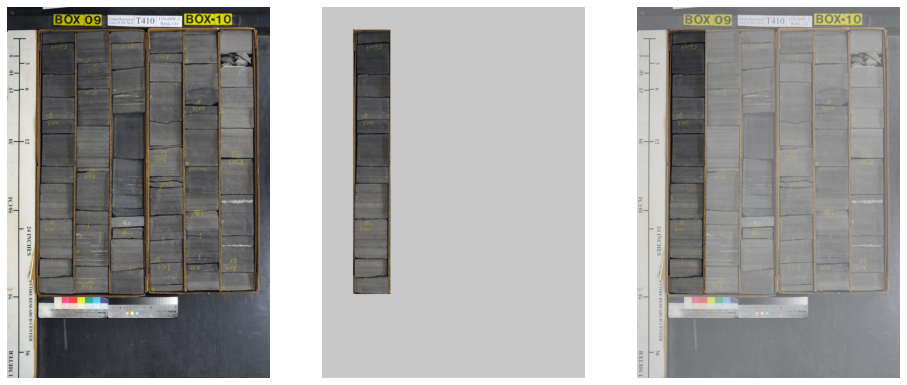

In [43]:
def rectangle_mask():
    search = "core_photo*box9.jpg"
    imgs = img_get(search=search)
    print(imgs)
    
    box9 = imread(imgs[0])
    mask = np.ones(shape=box9.shape[0:2], dtype="bool")
    
    img_info(box9)
    img_info(mask)
    
    # rr --> mask for rows
    rr, cc = rectangle(start=(250, 330), end=(3050,725))
    print(type(rr), rr.shape)
    print(type(cc), rr.shape)
    mask[rr, cc] = False
    
    box9_mask = np.copy(box9)
    box9_mask[mask] = 200
    # crop
    # color red
    compare_plot(box9, box9_mask)
    
rectangle_mask()

## Load napiri polygons

## Sobel Filter

uint8 0 255 (3942, 2789, 3)
float64 0.0 0.5128304612830016 (3942, 2789, 3)


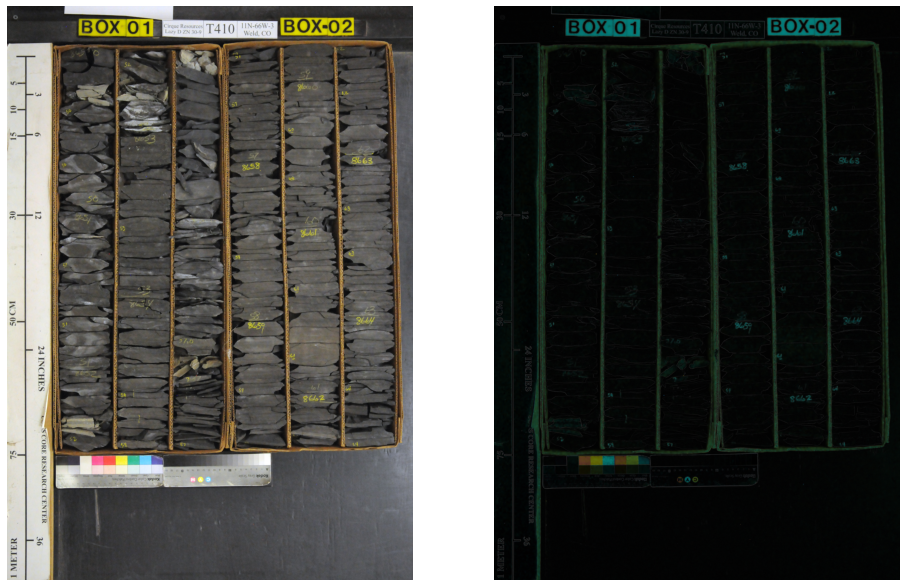

In [6]:

img = "./lazy_d_core_photos/core_photo_111344_box1.jpg"
original = imread(img)
edge_filt = sobel(original)

fig, axes = plt.subplots(1, 2, figsize=(16,12))
ax = axes.ravel()
for x in ax: x.axis("off")

ax[0].imshow(original)
ax[1].imshow(edge_filt)

img_info(original)
img_info(edge_filt)